# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.

Первым шагом импортируем необходимые для анализа библиотеки и откроем нужный файл. 

In [84]:
import os
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px

In [85]:
pth1 = '/datasets/games.csv'
pth2 = 'games.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

### Обработка данных
Шаги:
* Заменить названия столбцов (привести к нижнему регистру);
* Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
* Обработать пропуски при необходимости:
* Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
* Описать причины, которые могли привести к пропускам;
* Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
* Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

In [86]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [88]:
data.duplicated().sum()

0

Дубликатов не обнаружено. 

In [89]:
# приведём все столбцы к нижнему регистру для удобства дальнейшего анализа
data.columns = data.columns.str.lower()

In [90]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [91]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Замечаем, что есть пропущенные значения, обработаем данные столбцы

In [92]:
data['year_of_release'].isna().sum()

269

Объём пропущенных данных относительно небольшой, так что уберём данные пропуски из датафрейма. 

In [93]:
data = data.dropna(subset = ['year_of_release'])

In [94]:
data = data.dropna(subset = ['name'])

In [95]:
data = data.dropna(subset = ['genre'])

In [96]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [97]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [98]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [99]:
data['critic_score'].isna().sum()

8461

In [100]:
# поставим заглушку на пропуски в столбце с оценками критиков, заменим пропущенные 
# значения на '-1', так как сам столбец содержит данные в виде чисел
data['critic_score'] = data['critic_score'].fillna(-1)

In [101]:
# поставим заглушку на пропуски в столбце с рейтингом, здесь заменим на 'W',
# так как все значения являются категориальными. 
data['rating'] = data['rating'].fillna('W')

In [102]:
data['critic_score'] = data['critic_score'].astype('int')

In [103]:
data['user_score'].isna().sum()

6605

In [104]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Замечаем оценку пользователей со значением 'tbd', что расшифровывается как 'to be determined', что означает 'будет определено'.
Предположим, что пользователи не успели дать оценки в то время, как данный датафрейм был создан. Заменим данную аббревиатуру медианным значением. 

In [105]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [106]:
data['user_score'].value_counts()

7.8    322
8      285
8.2    276
8.3    252
7.5    249
      ... 
1.5      2
0.3      2
1.1      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [107]:
data['user_score'] = data['user_score'].astype('float')

Создадим столбец с суммарными продажами для дальнейшего анализа

In [108]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Причины пропусков: 
* технические ошибки
* на некоторые игры критики не успели дать оценки
* на некоторые игры пользователи не успели дать оценки
* пропуски в соответствии с рейтингом ESRB связаны с тем, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется.

Далее в ходе исследовательского анализа обнаружилась ошибка: данные по платформе DS в таблице представлены с 1985 года, хотя сама платформа появилась в 2004. Найдём строку с этим значением и удалим её. 

In [109]:
data[data['platform'] == 'DS']['year_of_release'].unique()

array([2006, 2005, 2010, 2009, 2004, 2007, 2012, 2008, 2011, 2013, 1985])

In [110]:
data[(data['platform'] == 'DS')&(data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,NaN,W,0.02


In [111]:
data = data.drop(index=[15957])

In [112]:
data = data.reset_index()

### Исследовательский анализ данных
Шаги: 
* Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Взять данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывать в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
* Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
* Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
* Соотнести выводы с продажами игр на других платформах.
* Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? * Выделяются ли жанры с высокими и низкими продажами?

In [113]:
# посмотрим, сколько игр выпускалось в разные года
data.groupby('year_of_release').agg({'name' : 'count'})

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,13
1986,21
1987,16
1988,15


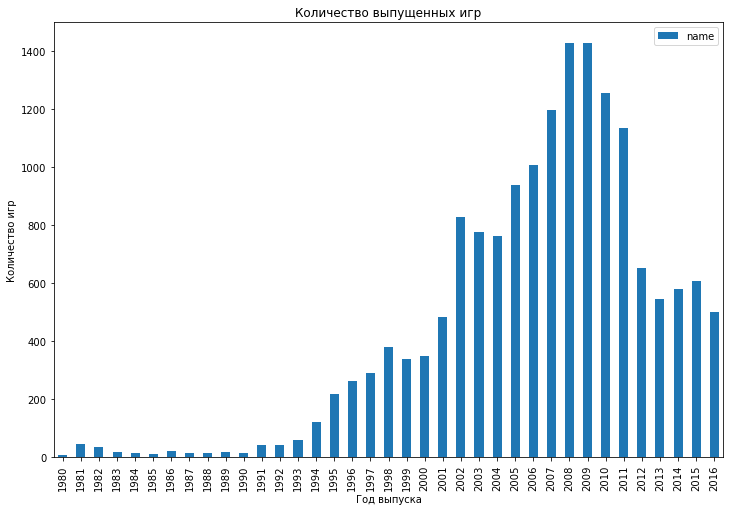

In [114]:
data.groupby('year_of_release').agg({'name' : 'count'}).plot(
    kind='bar', figsize=(12, 8))
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр');

Пик выпуска игр пришёлся на 2008 и 2009 года. 

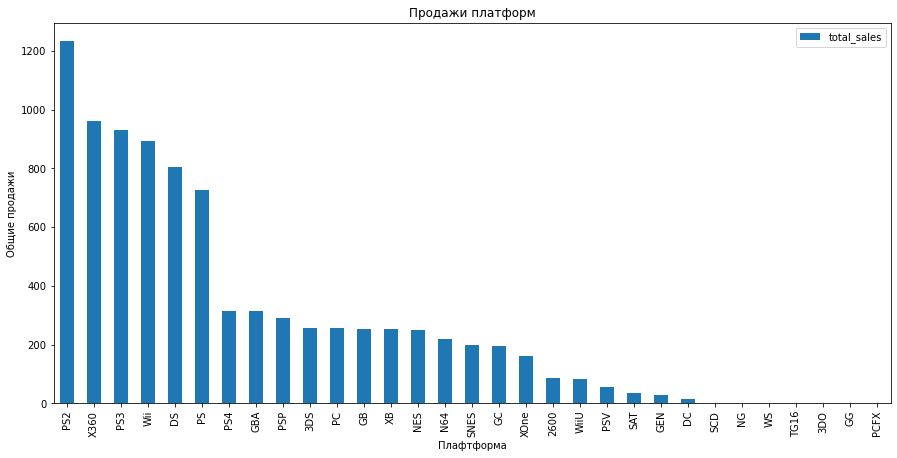

In [115]:
data.groupby('platform').agg({'total_sales' : 'sum'}).sort_values(
    by='total_sales', ascending=False).plot(kind='bar', figsize=(15, 7))
plt.xlabel('Плафтформа')
plt.ylabel('Общие продажи')
plt.title('Продажи платформ');

Видим первые 6 явных лидеров, 1 из которых - PS2. Посмотрим их распределение по годам. 

In [116]:
def platforms(platform):
    data[data['platform'] == platform].groupby(
        'year_of_release').agg({'total_sales' : 'sum'}).plot(
        kind='bar', figsize=(8, 4))
    plt.xlabel('год')
    plt.ylabel('общая выручка (млн)')
    plt.title(platform)

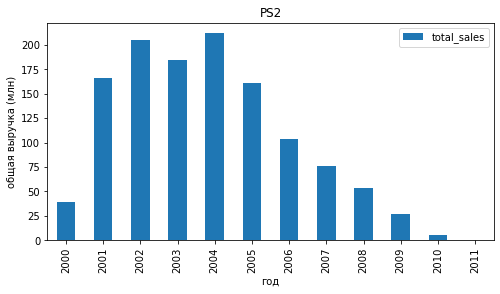

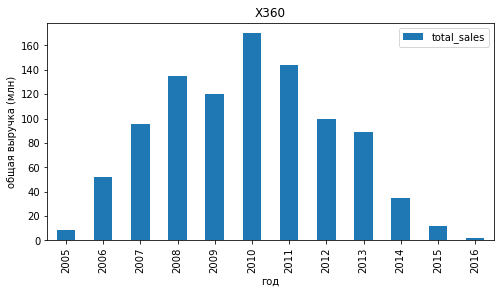

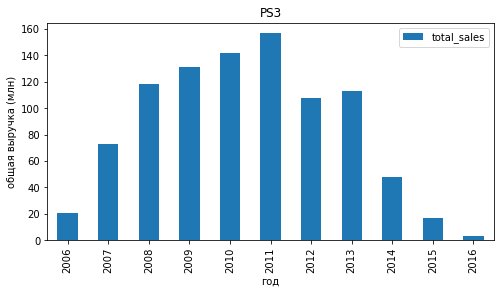

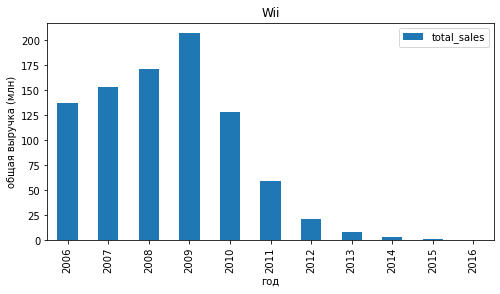

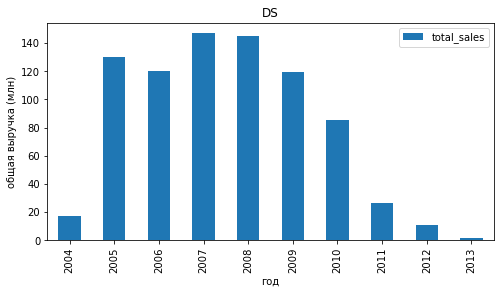

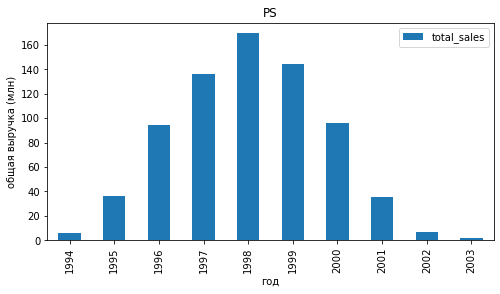

In [117]:
platforms('PS2')
platforms('X360')
platforms('PS3')
platforms('Wii')
platforms('DS')
platforms('PS')

Делаем вывод, что каждая платформа является актуальной примерно 10 лет после появления на рынке. Так же можно заметить, что устройства PS занимаю 3 из 6 лидирующих позиций и спад продаж 1 консоли начинается после возниковения устройства следующего поколения.

Для того, чтобы сделать прогноз на 2017, возьмём данные, начиная с 2012 года, так как в этом году значительно снизились продажи игр. 

In [118]:
new_data = data[data['year_of_release'] > 2011]

In [119]:
new_data_platform = new_data.groupby(['year_of_release', 'platform'], as_index=False).agg(
    {'total_sales':'sum'}).sort_values(by='year_of_release')

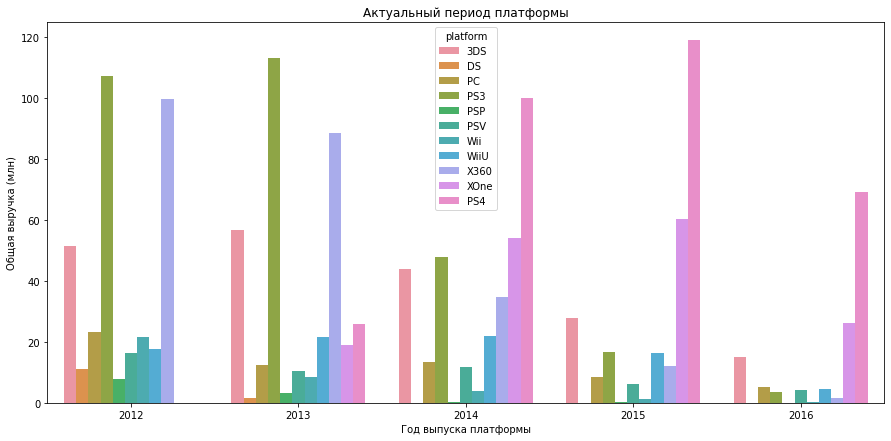

In [120]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(ax=ax, x='year_of_release', y='total_sales', hue='platform', 
            data = new_data_platform)
plt.xlabel('Год выпуска платформы')
plt.ylabel('Общая выручка (млн)')
plt.title('Актуальный период платформы');

* Видим, что по продажам лидируют PS4 и XOne
* Также можно считать данные актуальными с 2014 года, так как именно в 2014 произошла смена поколений PS и Xbox

In [121]:
actual_data = data[data['year_of_release'] > 2013]

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

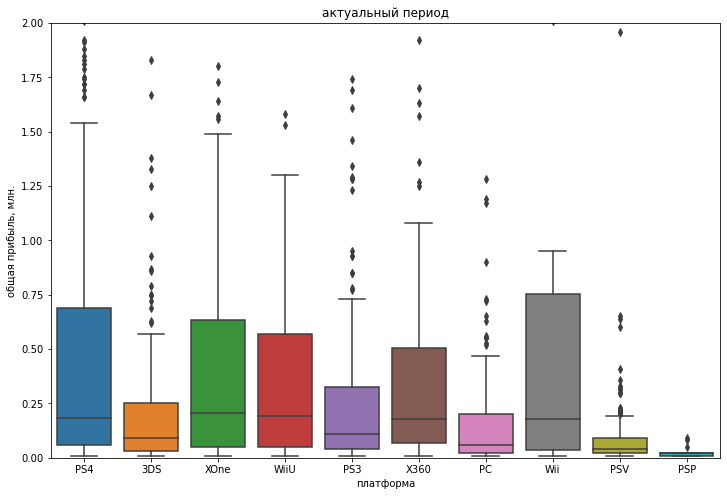

In [122]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=actual_data)
plt.xlabel('платформа')
plt.ylabel('общая прибыль, млн.')
plt.title('актуальный период')
plt.ylim(0, 2);

Здесь уместна вторая диаграмма размаха со всеми максимумами продаж за актуальный период, а не только с масштабированными данными. А так мы не видим выбросы.</font>

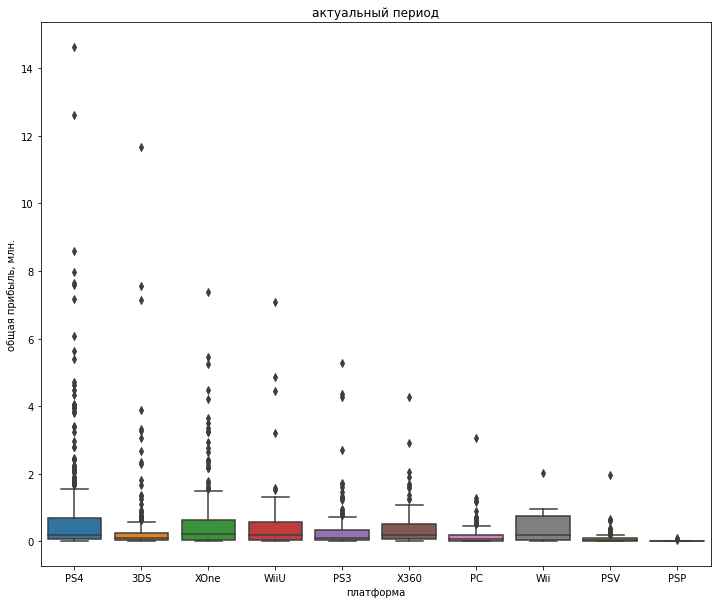

In [123]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='platform', y='total_sales', data=actual_data)
plt.xlabel('платформа')
plt.ylabel('общая прибыль, млн.')
plt.title('актуальный период');

* Как видим, с 2014 года старые платформы становятся неактуальными, а новые поколения встают в лидирующие позциии по продажам игр, однако потом идёт общий упадок продаж. 
* Тут можно сразу выделить лидера продаж - PS4. На 2-м месте идёт XOne. 
* Так же можно обратить внимание, что есть средние лидеры по продажам. Туда можно отнести X360, WiiU, Wii.
* И на самом последнем месте оказались портативные приставки, что может быть связано с развитием игр на смартфонах  

Для интерпретации диаграмм размаха помогает вспомнить, что означают боксплоты:</font>
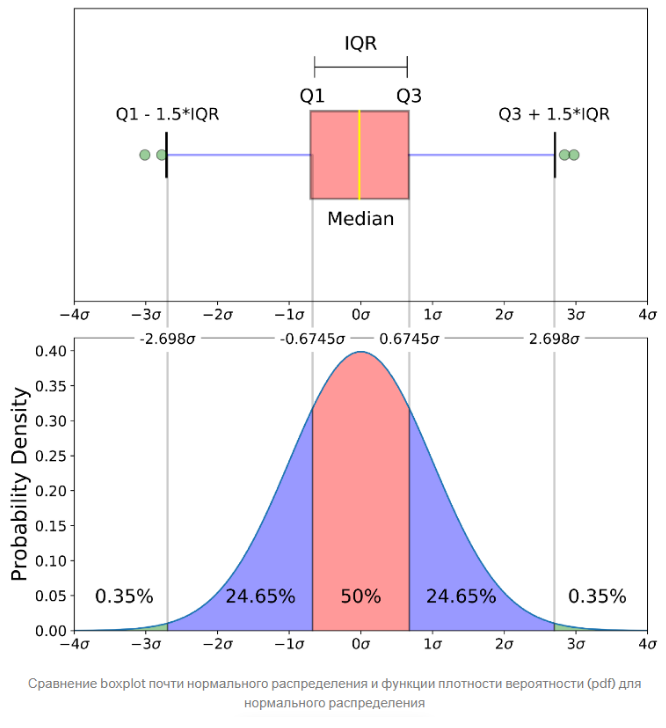

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [124]:
actual_data.pivot_table(index='platform', values='total_sales').sort_values(
    by='total_sales', ascending=False).head(6)

,total_sales
platform,
PS4,0.766356
XOne,0.615614
WiiU,0.588767
Wii,0.460909
X360,0.434414
3DS,0.408868


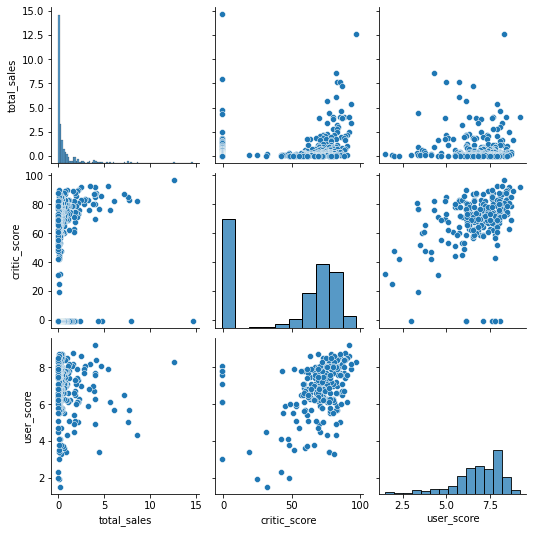

In [125]:
sns.pairplot(actual_data[actual_data['platform'] == 'PS4'][['total_sales',
                                     'critic_score', 'user_score']]);

In [126]:
actual_platforms = actual_data['platform'].unique().tolist()
actual_data_s = actual_data.loc[(actual_data['critic_score'] != -1)&(actual_data['user_score'] != 'NaN')]

In [127]:
actual_data_s.user_score.unique()

array([8.3, 4.3, 5.7, 5. , 6.5, 9.1, 6.1, 7.9, 5.4, 8.1, 6.4, 3.4, 8.5,
       6.2, 8.4, 6.3, 7.7, 9.2, 4.9, 7.6, 8.7, 6.7, 7. , 4.1, 8.2, 6.8,
       5.5, 7.5, 4.4, 5.9, 7.2, 6.9, 3.9, 8.6, 3.1, 9. , 7.3, 7.4, 6. ,
       7.1, 8.8, 5.1, 6.6, 4.5, 5.8, 8.9, 8. , 7.8, 5.2, 5.6, 9.3, 4. ,
       4.6, 3.6, 3. , 3.7, 4.7, 5.3, 3.2, 4.8, 3.8, 3.3, 4.2, 1.5, nan,
       2.5, 2.1, 3.5, 2.9, 1.9, 1.4, 2.4, 2. , 2.3])

In [128]:
critic_score = {}
user_score = {}

for i in actual_platforms: # Создает словарь из таблиц актуальных платформ
    critic_score[i] = actual_data.loc[(actual_data['platform'] == i) & 
                               (actual_data['critic_score'] != -1)].reset_index()

    user_score[i] = actual_data.loc[(actual_data['platform'] == i) & 
                               (actual_data['user_score'] != 'NaN')].reset_index()

PS4


,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.043186
critic_score,0.402661,1.000000,0.546434
user_score,-0.043186,0.546434,1.000000


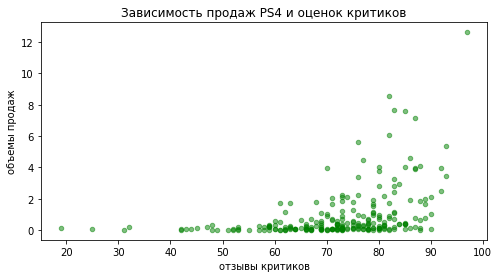

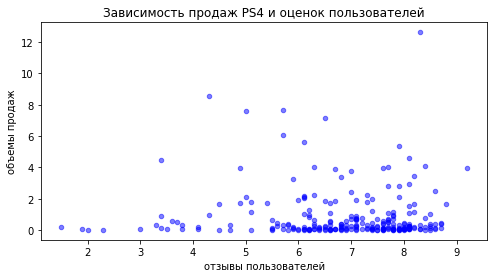

In [129]:
critic_score['PS4'].plot(kind='scatter', x='critic_score', y='total_sales',
                       figsize=(8, 4), color='g', alpha=0.5)
plt.title('Зависимость продаж PS4 и оценок критиков')
plt.ylabel('объемы продаж')
plt.xlabel('отзывы критиков')

user_score['PS4'].plot(kind='scatter', x='user_score', y='total_sales',
                     figsize=(8, 4), color='b', alpha=0.5)
plt.rcParams.update({'font.size': 10})
plt.title('Зависимость продаж PS4 и оценок пользователей')
plt.ylabel('объемы продаж')
plt.xlabel('отзывы пользователей');

print('PS4')

actual_data_s[actual_data_s['platform'] == 'PS4'][
    ['total_sales', 'critic_score', 'user_score']].corr()

XOne


,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.091734
critic_score,0.428677,1.000000,0.440977
user_score,-0.091734,0.440977,1.000000


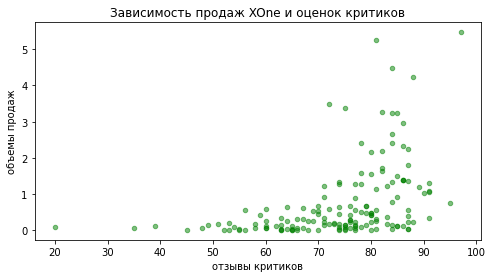

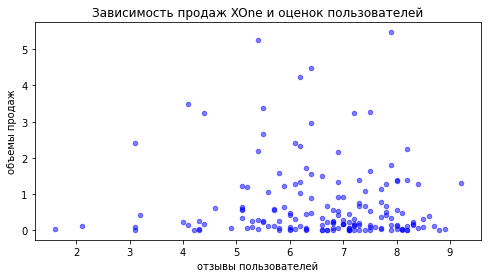

In [130]:
critic_score['XOne'].plot(kind='scatter', x='critic_score', y='total_sales',
                       figsize=(8, 4), color='g', alpha=0.5)
plt.title('Зависимость продаж XOne и оценок критиков')
plt.ylabel('объемы продаж')
plt.xlabel('отзывы критиков')

user_score['XOne'].plot(kind='scatter', x='user_score', y='total_sales',
                     figsize=(8, 4), color='b', alpha=0.5)
plt.rcParams.update({'font.size': 10})
plt.title('Зависимость продаж XOne и оценок пользователей')
plt.ylabel('объемы продаж')
plt.xlabel('отзывы пользователей');

print('XOne')

actual_data_s[actual_data_s['platform'] == 'XOne'][
    ['total_sales', 'critic_score', 'user_score']].corr()

WiiU


,total_sales,critic_score,user_score
total_sales,1.000000,0.370201,0.411451
critic_score,0.370201,1.000000,0.763536
user_score,0.411451,0.763536,1.000000


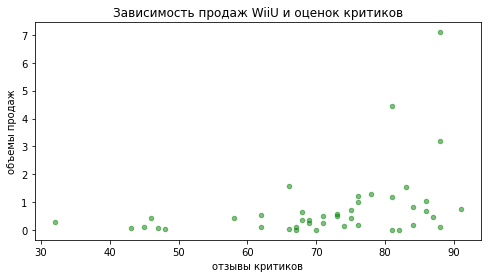

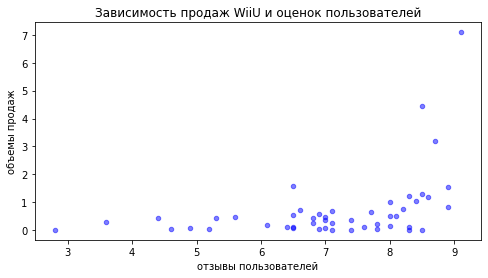

In [131]:
critic_score['WiiU'].plot(kind='scatter', x='critic_score', y='total_sales',
                       figsize=(8, 4), color='g', alpha=0.5)
plt.title('Зависимость продаж WiiU и оценок критиков')
plt.ylabel('объемы продаж')
plt.xlabel('отзывы критиков')

user_score['WiiU'].plot(kind='scatter', x='user_score', y='total_sales',
                     figsize=(8, 4), color='b', alpha=0.5)
plt.rcParams.update({'font.size': 10})
plt.title('Зависимость продаж WiiU и оценок пользователей')
plt.ylabel('объемы продаж')
plt.xlabel('отзывы пользователей');

print('WiiU')

actual_data_s[actual_data_s['platform'] == 'WiiU'][
    ['total_sales', 'critic_score', 'user_score']].corr()

Wii


,total_sales,critic_score,user_score
total_sales,NaN,NaN,NaN
critic_score,NaN,NaN,NaN
user_score,NaN,NaN,NaN


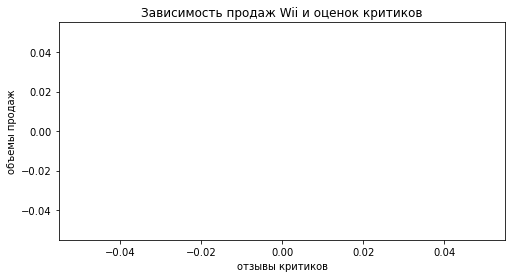

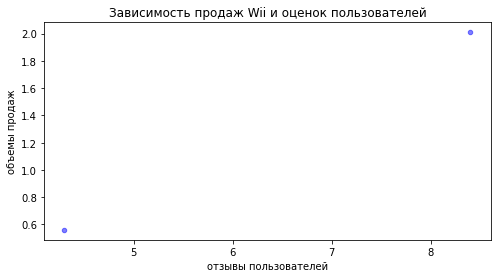

In [132]:
critic_score['Wii'].plot(kind='scatter', x='critic_score', y='total_sales',
                       figsize=(8, 4), color='g', alpha=0.5)
plt.title('Зависимость продаж Wii и оценок критиков')
plt.ylabel('объемы продаж')
plt.xlabel('отзывы критиков')

user_score['Wii'].plot(kind='scatter', x='user_score', y='total_sales',
                     figsize=(8, 4), color='b', alpha=0.5)
plt.rcParams.update({'font.size': 10})
plt.title('Зависимость продаж Wii и оценок пользователей')
plt.ylabel('объемы продаж')
plt.xlabel('отзывы пользователей');

print('Wii')

actual_data_s[actual_data_s['platform'] == 'Wii'][
    ['total_sales', 'critic_score', 'user_score']].corr()

Как видим, данных по платформе Wii недостаточно для анализа зависимости продаж от оценок критиков и пользователей. 

X360


,total_sales,critic_score,user_score
total_sales,1.000000,0.525723,0.336514
critic_score,0.525723,1.000000,0.625309
user_score,0.336514,0.625309,1.000000


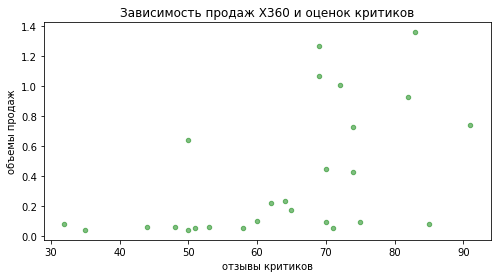

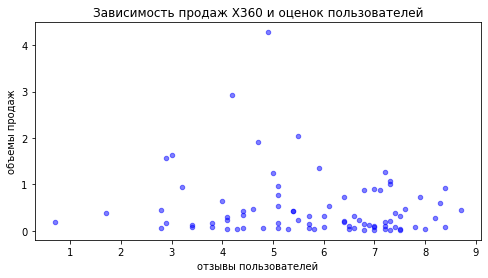

In [133]:
critic_score['X360'].plot(kind='scatter', x='critic_score', y='total_sales',
                       figsize=(8, 4), color='g', alpha=0.5)
plt.title('Зависимость продаж X360 и оценок критиков')
plt.ylabel('объемы продаж')
plt.xlabel('отзывы критиков')

user_score['X360'].plot(kind='scatter', x='user_score', y='total_sales',
                     figsize=(8, 4), color='b', alpha=0.5)
plt.rcParams.update({'font.size': 10})
plt.title('Зависимость продаж X360 и оценок пользователей')
plt.ylabel('объемы продаж')
plt.xlabel('отзывы пользователей');

print('X360')

actual_data_s[actual_data_s['platform'] == 'X360'][
    ['total_sales', 'critic_score', 'user_score']].corr()

3DS


,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.279850
critic_score,0.314117,1.000000,0.862485
user_score,0.279850,0.862485,1.000000


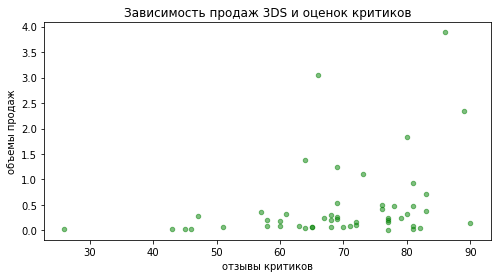

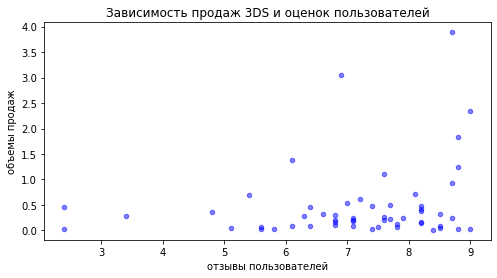

In [134]:
critic_score['3DS'].plot(kind='scatter', x='critic_score', y='total_sales',
                       figsize=(8, 4), color='g', alpha=0.5)
plt.title('Зависимость продаж 3DS и оценок критиков')
plt.ylabel('объемы продаж')
plt.xlabel('отзывы критиков')

user_score['3DS'].plot(kind='scatter', x='user_score', y='total_sales',
                     figsize=(8, 4), color='b', alpha=0.5)
plt.rcParams.update({'font.size': 10})
plt.title('Зависимость продаж 3DS и оценок пользователей')
plt.ylabel('объемы продаж')
plt.xlabel('отзывы пользователей');

print('3DS')

actual_data_s[actual_data_s['platform'] == '3DS'][
    ['total_sales', 'critic_score', 'user_score']].corr()

* Прямой зависимости между продажами платформ и оценками игр пользователями нет. 
* Наблюдается умеренная зависимость между продажами платформ PS4, XOne, X360 и оценками игр критиками. 

Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
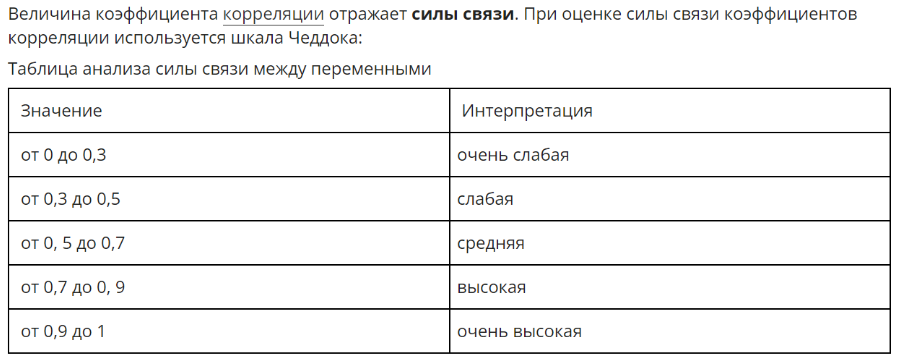

Посмотрим, какие жанры игр являются самыми популярными. 

In [135]:
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


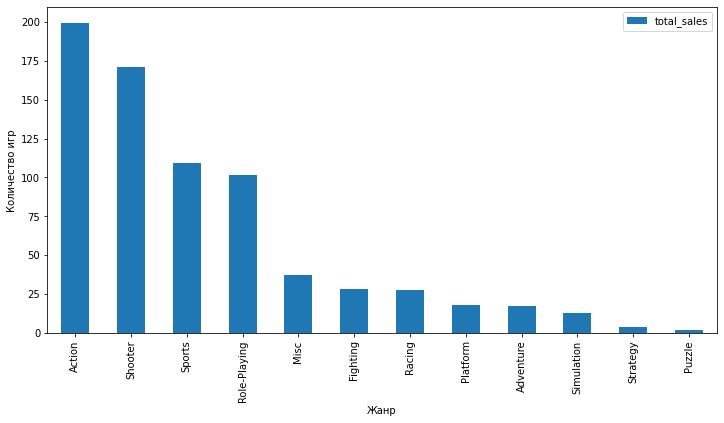

In [136]:
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).plot(kind='bar', figsize=(12, 6))
plt.xlabel('Жанр')
plt.ylabel('Количество игр');

Наибольшую долю рынка занимают игры жанра Action, за ними идут Shooter, Sports и Role-Playing. Игры с менее активным геймплеем сильно отстают. 

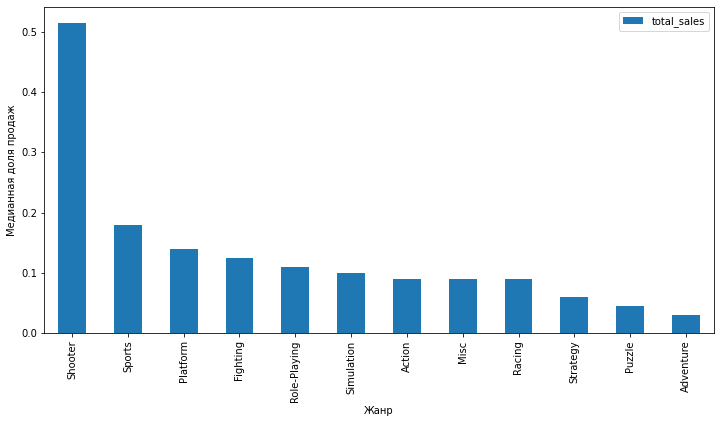

In [137]:
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False).plot(kind='bar', figsize=(12, 6))
plt.xlabel('Жанр')
plt.ylabel('Медианная доля продаж');

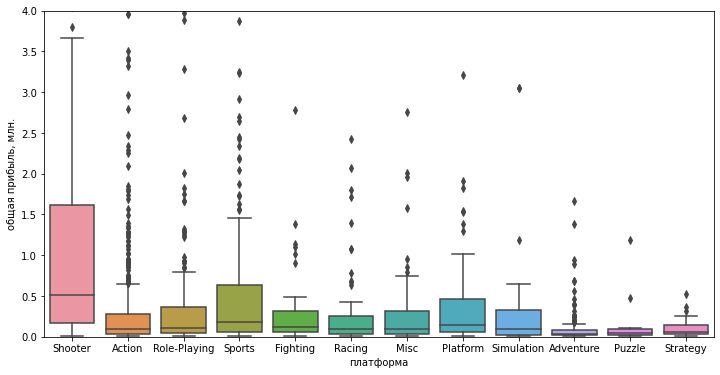

In [138]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=actual_data)
plt.xlabel('платформа')
plt.ylabel('общая прибыль, млн.')
plt.ylim(0, 4);

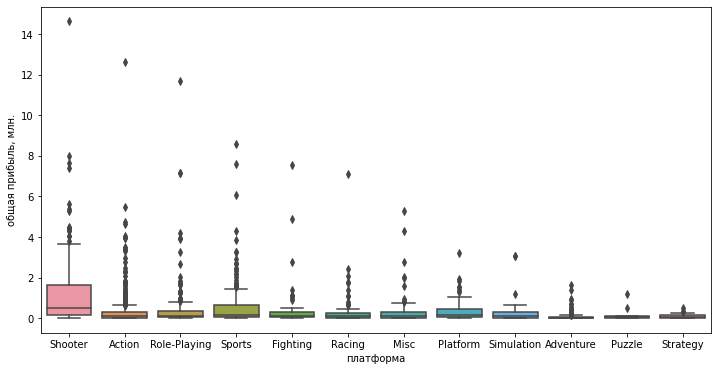

In [139]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=actual_data)
plt.xlabel('платформа')
plt.ylabel('общая прибыль, млн.');

Как видим, самым стабильным жанром, который приносит доход не зависимо от платформы, является Shooter, значит, на этот жанр есть устойчивый спрос. 

### Составим портрет пользователя каждого региона. 
Шаги: 
* Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Начнём с популярности игровых платформ для регионов. 

In [140]:
def regions(group, region, xlabel, title):
    portrait = actual_data.groupby(group, as_index=False).agg(
        {region:'sum'}).sort_values(by=region, ascending=False)
    portrait['ratio'] = portrait[region] / portrait[region].sum() * 100
    print(portrait.head())
    fig, ax = plt.subplots(figsize=(12,6))
    sns.barplot(ax=ax, x = group, y = portrait['ratio'], data = portrait.head())
    plt.xlabel(xlabel)
    plt.ylabel('доля рынка')
    plt.title(title)

  platform  na_sales      ratio
3      PS4     98.61  34.714497
9     XOne     81.27  28.610153
8     X360     28.30   9.962684
0      3DS     22.64   7.970147
2      PS3     22.05   7.762445


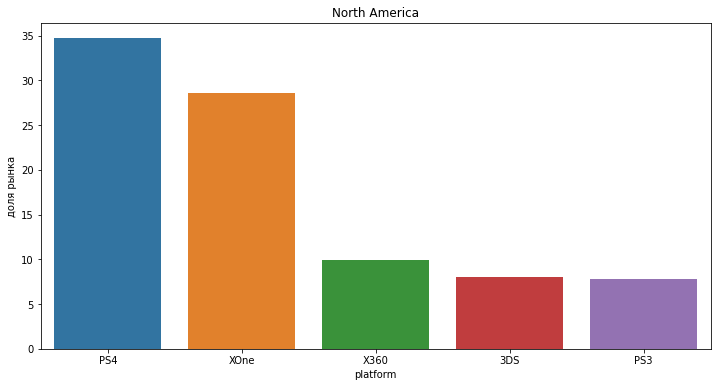

In [141]:
regions('platform', 'na_sales', 'platform', 'North America')

  platform  eu_sales      ratio
3      PS4    130.04  48.041968
9     XOne     46.25  17.086597
2      PS3     25.54   9.435496
1       PC     17.97   6.638836
0      3DS     16.12   5.955372


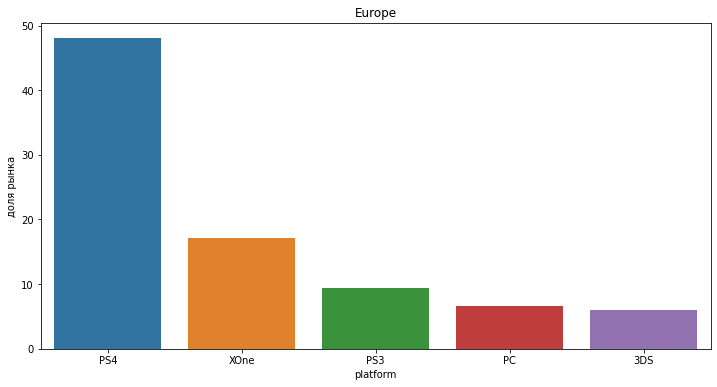

In [142]:
regions('platform', 'eu_sales', 'platform', 'Europe')

  platform  jp_sales      ratio
0      3DS     44.24  47.523902
3      PS4     15.02  16.134923
5      PSV     14.54  15.619293
2      PS3     11.22  12.052852
7     WiiU      7.31   7.852616


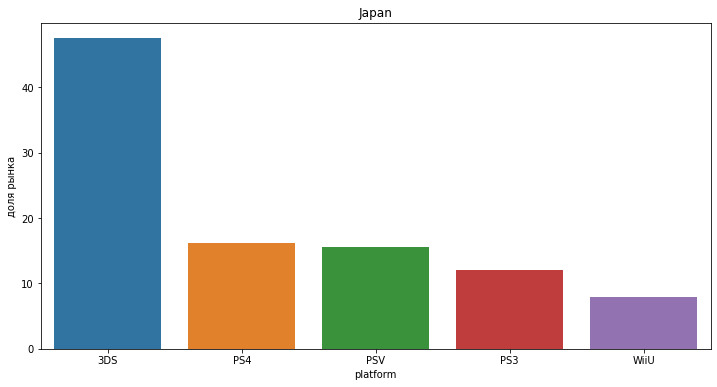

In [143]:
regions('platform', 'jp_sales', 'platform', 'Japan')

* В Северной Америке преобладают PS4 и XOne. Более старые поколения и портативные приставки сильно отстают. 
* В Европе PS4 сильно лидирует в сравнении с другими платформами и занимает почти половину рынка. 
* В Японии заметно преобладает портативная приставка своего же производства - Nintendo 3DS. Компании XBox в лидерах нет в принципе в сравнении с другими регионами. 

Рассмотрит какие жанры игр преобладают у пользователей.

           genre  na_sales      ratio
8        Shooter     79.02  27.818067
0         Action     72.53  25.533338
10        Sports     46.13  16.239527
7   Role-Playing     33.47  11.782722
3           Misc     15.05   5.298176


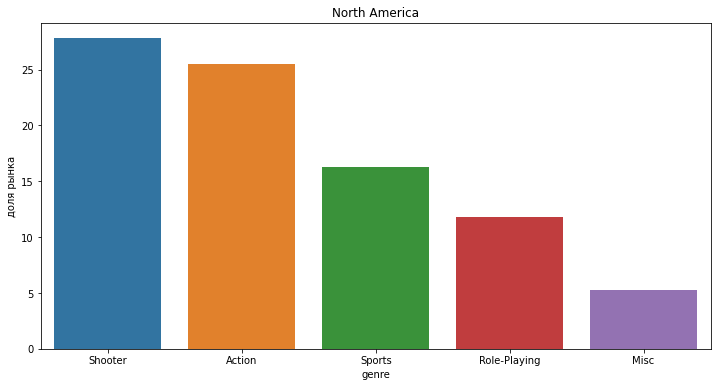

In [144]:
regions('genre', 'na_sales', 'genre', 'North America')

           genre  eu_sales      ratio
0         Action     74.68  27.589774
8        Shooter     65.52  24.205704
10        Sports     45.73  16.894488
7   Role-Playing     28.17  10.407123
6         Racing     14.13   5.220186


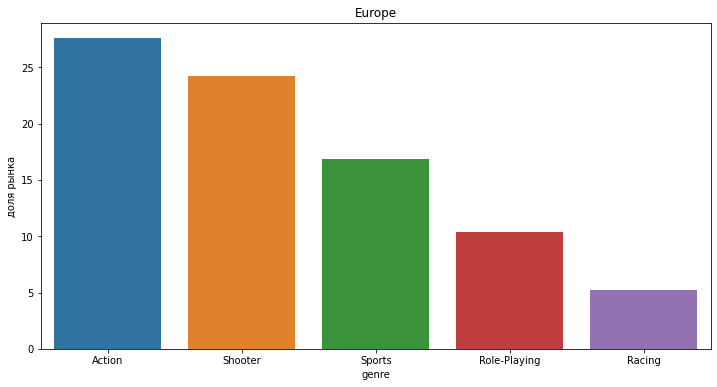

In [145]:
regions('genre', 'eu_sales', 'genre', 'Europe')

          genre  jp_sales      ratio
7  Role-Playing     31.16  33.472983
0        Action     29.58  31.775701
2      Fighting      6.37   6.842840
3          Misc      5.61   6.026426
8       Shooter      4.87   5.231496


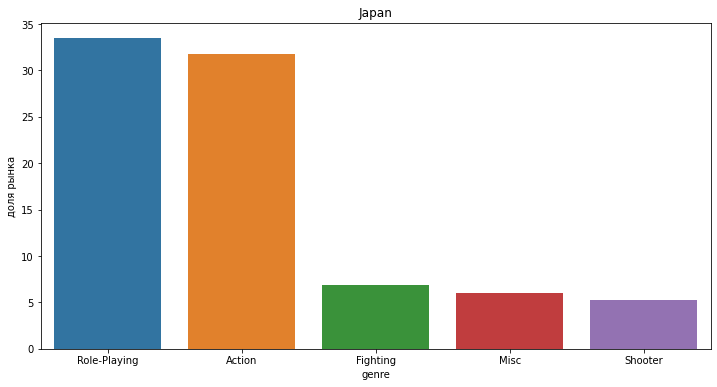

In [146]:
regions('genre', 'jp_sales', 'genre', 'Japan')

In [147]:
genre_5 = actual_data.pivot_table(index='genre', 
                                  values=['na_sales', 'eu_sales', 'jp_sales'])
fig = make_subplots(rows=1, cols=3, 
                     specs = [[{'type': 'domain'}, {'type': 'domain'},
                              {'type': 'domain'}]],
                     subplot_titles = ['Europe', 'Japan', 'North America']
                   )

for i, col in enumerate (genre_5):
    df = genre_5.sort_values(col, ascending = False)\
    .reset_index()
    df.loc[df.index > 4, 'genre'] = 'other'
    fig.add_trace(
        go.Pie(values=df[col], labels=df['genre'], textinfo='label+percent',
                insidetextorientation='radial'), row=1, col=i+1
        )
    fig.update(layout_showlegend=False)
fig.show()

* В Северной Америке по продажам заметно преобладает жанр Shooting
* В Европе по продажам заметно преобладают жанр Shooting
* В Японии по продажам заметно преобладают жанр Role-Playing. Возможно это связанно с особенностями культуры и жизни в Японии. 

Далее посмотрим, как влияет ли рейтинг ESRB на продажи в разных регионах.

В столбце rating лежат оценки согласно классификации ESRB:

* E (Everyone) - для всех возрастов
* EC (Early childhood) - для детей от 3 лет
* E10+ (Everyone 10 and older) - для детей от 10 лет
* T (Teen) - для лиц от 13 лет
* M (Mature) - для лиц от 17 лет
* AO (Adults Only 18+) - для лиц старше 18 лет
* RP (Rating Pending) - оценка ещё не присвоена

In [148]:
def ratings(actual_data, group, region, title):
    actual_data = actual_data[actual_data['rating'] != 'W']
    rating = actual_data.groupby(group, as_index=False).agg(
        {region:'sum'}).sort_values(by=region, ascending=False) 
    print(rating)
    fig, ax = plt.subplots(figsize=(12,6))
    sns.barplot(ax=ax, x=group, y=region, data = rating)
    plt.xlabel('рейтинг')
    plt.ylabel('общие продажи (млн)')
    plt.title(title)

  rating  na_sales
2      M     96.42
0      E     50.74
3      T     38.95
1   E10+     33.23


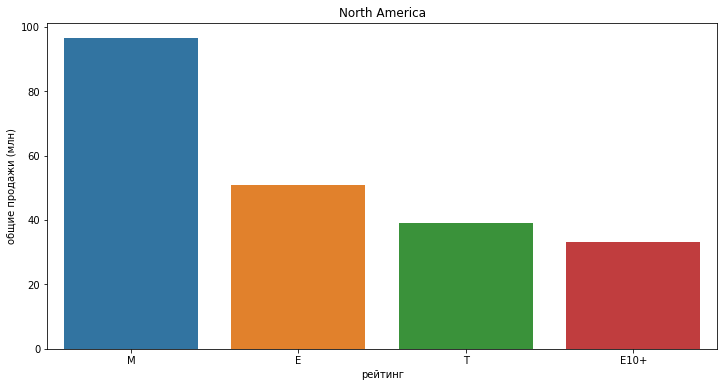

In [149]:
ratings(actual_data, 'rating', 'na_sales', 'North America')

  rating  eu_sales
2      M     93.44
0      E     58.06
3      T     34.07
1   E10+     26.16


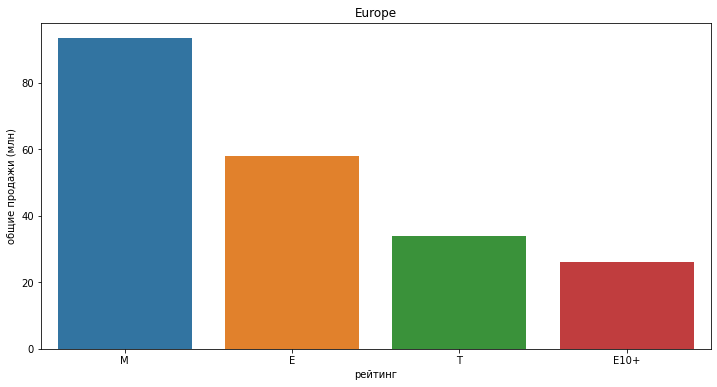

In [150]:
ratings(actual_data, 'rating', 'eu_sales', 'Europe')

  rating  jp_sales
3      T     14.78
0      E      8.94
2      M      8.01
1   E10+      4.46


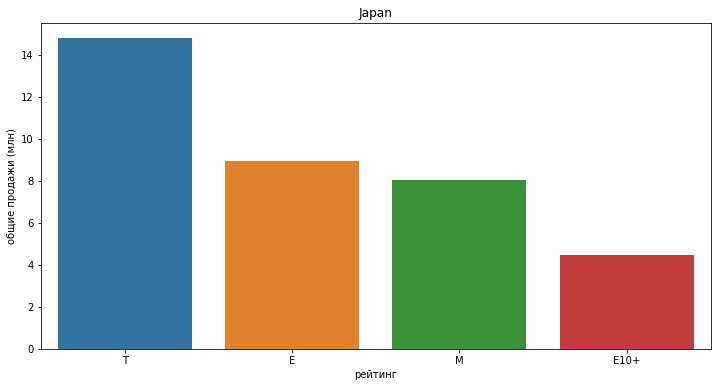

In [151]:
ratings(actual_data, 'rating', 'jp_sales', 'Japan')

* В Северной Америке и Европе виды рейтинга распределены одинаково: M -> E -> T -> E10+. Самая популярная категория 17+
* В Японии ситуация несколько иная: T -> E -> M -> E10+. Самая популярная категория 13+. Возможно это связано с тем, что большая часть игр в Японии расчитана на более младшую аудиторию и что дети помладше играют чаще, чем взрослые. 

Посмотрим, какое количество продаж в каждой стране занимают игры без рейтинга ESRB, для этого уберём заглушку. 'W' в нашем случае означает, что игре не присвоен рейтинг ESRB.

In [152]:
def ratings(actual_data, group, region, title):
   # actual_data = actual_data[actual_data['rating'] != 'W']
    rating = actual_data.groupby(group, as_index=False).agg(
        {region:'sum'}).sort_values(by=region, ascending=False) 
    print(rating)
    fig, ax = plt.subplots(figsize=(12,6))
    sns.barplot(ax=ax, x=group, y=region, data = rating)
    plt.xlabel('рейтинг')
    plt.ylabel('общие продажи (млн)')
    plt.title(title)

  rating  na_sales
2      M     96.42
4      W     64.72
0      E     50.74
3      T     38.95
1   E10+     33.23


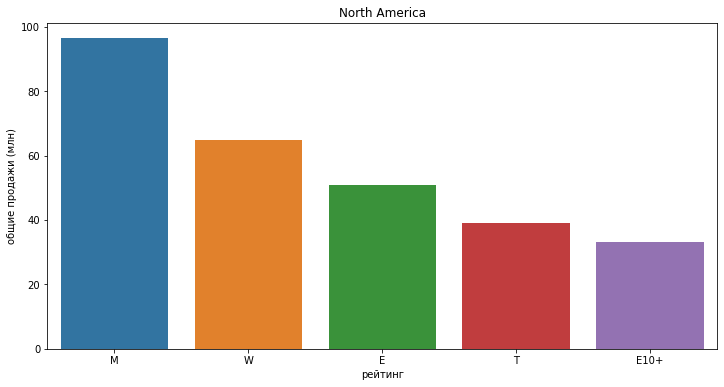

In [153]:
ratings(actual_data, 'rating', 'na_sales', 'North America')

  rating  eu_sales
2      M     93.44
4      W     58.95
0      E     58.06
3      T     34.07
1   E10+     26.16


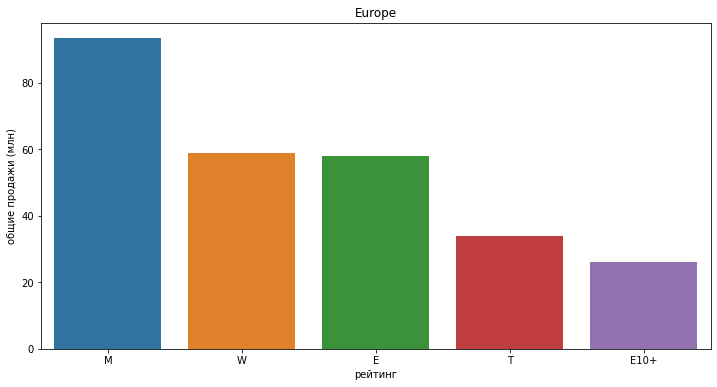

In [154]:
ratings(actual_data, 'rating', 'eu_sales', 'Europe')

  rating  jp_sales
4      W     56.90
3      T     14.78
0      E      8.94
2      M      8.01
1   E10+      4.46


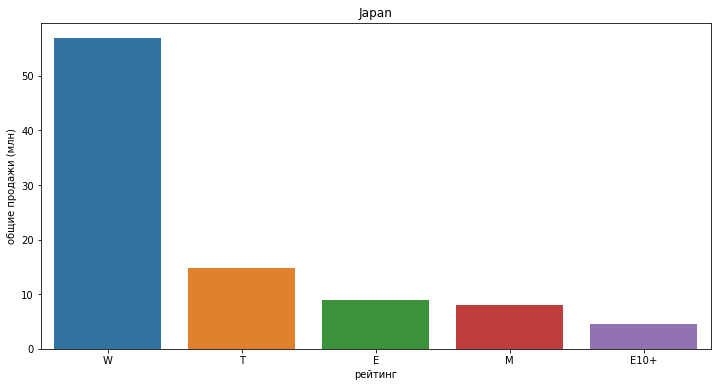

In [155]:
ratings(actual_data, 'rating', 'jp_sales', 'Japan')

Видим, что игр без рейтинга довольно много: 
* В Северной Америке и Европе данная категория расположилась на 2 месте, а в Японии занимет 1 место с большим отрывом. Это связано с тем, что рейтинг ESRB преназначен для маркировки игр США и Канады. 
* Так как в Японии большую часть продаж занимают платформы самой Японии и её игры, логично, что большая часть продаж игр находятся без рейтинга ESRB. 

In [156]:
temp = actual_data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


W       749
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

### Проверим 2 гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

Значение alpha = 0.05, так как оно является классическим в статистическом анализе. 

* H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные

In [157]:
xone = actual_data[actual_data['platform']=='XOne']['user_score'].dropna()
pc = actual_data[actual_data['platform']=='PC']['user_score'].dropna()

In [158]:
alpha = 0.05
result = st.ttest_ind(xone, pc, equal_var = False)
print('p-value:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


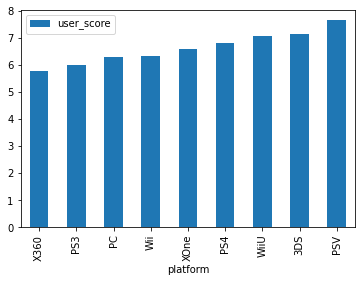

In [159]:
actual_data.pivot_table(index='platform', values='user_score').sort_values('user_score').plot(kind='bar');

Видим, что разница в рейтинге между XOne и PC незначительна, что подтвержет наши вычисления и гипотезу. 

* H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
* H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [160]:
action = actual_data[actual_data['genre']=='Action']['user_score'].dropna()
sports = actual_data[actual_data['genre']=='Sports']['user_score'].dropna()

In [161]:
alpha = 0.05
result = st.ttest_ind(action, sports, equal_var = False)
print('p-value:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


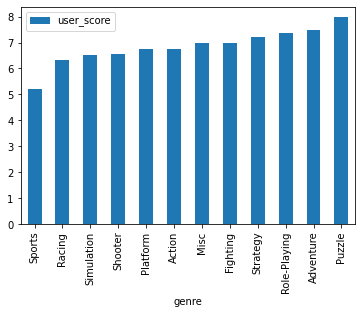

In [162]:
actual_data.pivot_table(index='genre', values='user_score').sort_values('user_score').plot(kind='bar');

Видим довольно сильную разницу в рейтинге между жанрами Action и Sports, что подтверждает наши расчёты. 

* Первая гипотеза не отвергнута. Игры на XOne и PC имеют примерно одинаковый средний пользовательский рейтинг.
* Вторая гипотеза отвергнута. Средний пользовательский рейтинг игр жанров 'Action' и 'Sports' сильно отличается.

# Общий вывод:
* C 1980 количество игр постепенно росло, пик пришёлся на 2008 и 2009 года, после чего количество выпускаемых игр пошло на спад;
* Топ платформ по продажам: PS2, X360, PS3, Wii, DS, PS;
* Срок актуальности платформы в среденем составляет 10 лет, после чего её заменят более современная модель;
* Лидирующие позиции по продажам с 2014 по 2016 года занимают PS4 и XOne;
* Прямой зависимости между продажами платформ и оценками игр критиками и пользователями не выявлено;
* Наблюдается умеренная зависимость между продажами платформ PS4, XOne, X360 и оценками игр критиками;
* Наибольшую долю рынка составляют игры жанра Action, за ними идут Shooting, Sports и Role-Playing. Игры с менее активным геймплеем сильно отстают;
* Однако самым прибыльным и стабильным жанром является Shooting с очень большой разницей в сравнении с другими жанрами;
* В Северной Америке преобладают PS4 и XOne. Более старые поколения и портативные приставки сильно отстают;
* В Европе PS4 сильно лидирует в сравнении с другими платформами и занимает почти половину рынка;
* В Японии заметно преобладает портативная приставка своего же производства - Nintendo 3DS. Компании XBox в лидерах нет в принципе в сравнении с другими регионами;
* В Северной Америке заметно преобладают продажи жанра Shooting;
* В Европе заметно преобладают продажи жанра Shooting;
* В Японии заметно преобладают продажи жанра Role-Playing. Возможно это связанно с особенностями культуры и жизни в Японии;
* В Северной Америке и Европе виды рейтинга распределены одинаково: M -> E -> T -> E10+. Самая популярная категория 17+;
* В Японии ситуация несколько иная: T -> E -> M -> E10+. Самые популярные игры в Японии являются японскими. Самая популярная категория ESRB - 13+. Возможно это связано с тем, что большая часть игр в Японии расчитана на более младшую аудиторию и что дети помладше играют чаще, чем взрослые;
* Игры на XOne и PC имеют примерно одинаковый средний пользовательский рейтинг;
* Средний пользовательский рейтинг игр жанров 'Action' и 'Sports' сильно отличается.

# Выводы для отдела рекламы:

#### Северная Америка:
* В Северной Америке лучше рекламировать платформы PS4 и XOne и последующие поколения;
* В Северной Америке лучше рекламировать игры с категорией M (17+);
* В Северной Америке лучше рекламировать игры жанра Shooting, так как этот жанр является самым маржинальным и стабильным, так же следует уделять внимание жанру Action, так как он занимает большую часть рынка.
#### Европа:
* В Европе наблюдается похожая ситуация, отличающаяся только разницей в продажах между PS4 и XOne;
* В Европе лучше рекламировать платформы PS4 и XOne и последующие поколения;
* В Европе лучше рекламировать игры с категорией M (17+);
* В Европе лучше рекламировать игры жанра Shooting, так как этот жанр является самым маржинальным и стабильным, так же следует уделять внимание жанру Action, так как он занимает большую часть рынка.
#### Япония:
* В Японии ситуация совершенно иная:
* Самой продаваемой платформой является Nintendo 3DS, так что тратить рекламный бюджет лучше на неё и последующие поколения;
* Большая часть игр не имеет рейтинга ESRB, одна те игры, у которых он есть, расчитаны на аудиторию помладше (13+), следовательно, стоит больше рекламировать игры с таким рейтингом и игры, выпускаемые компаниями Японии;
* Самым популярным жанров в Японии является Role-Playing, следовательно, стоит больше рекламировать игры этого жанра. 